In [1]:
import pandas as pd
import os
import numpy as np 
import datetime
import matplotlib.pyplot as plt
from datetime import timedelta
from random import sample
import Data_Pipeline as pipeline
os.getcwd()

'd:\\courses\\Weaning\\COM4520-Darwin-weaing-of-ventilators\\Transformers\\data_process'

### Load Dataset

In [2]:
# Get data
names=['Time', 'ID', 'AdmissionDate', 'DischargeDate', 'CCOutcome', 'HospOutcome', 'VentMode',
       'PS_Above_PEEP', 'EPAP_PEEP', 'SET_FIO2', 'Spont_RR', 'Deadspace', 'SBI', 'P01'
       , 'PH', 'PaCO2', 'PaO2', 'LactateABG', 'HeartRate', 'ArtSystollic', 'ArtMAP', 
       'Temperature', 'empty_col']
datatypes = dtype={'Time': 'string','ID': int, 'AdmissionDate': 'string', 'DischargeDate': 'string',
                   'CCOutcome': 'string', 'HospOutcome': 'string', 'VentMode': 'string',
                   'PS_Above_PEEP': 'string', 'EPAP_PEEP': float, 'SET_FIO2': float, 'Spont_RR': float,
                   'Deadspace': float, 'SBI': 'string', 'P01': float, 'PH': float, 'PaCO2': float,
                   'PaO2': float, 'LactateABG': float, 'HeartRate': float, 'ArtSystollic': float,
                   'ArtMAP': float, 'Temperature': float, 'empty_col': 'string'}
# 'SET_FIO2': float, 'HeartRate': float, 'ArtSystollic': float, 'ArtMAP': float as it deals with NaN vals
# All cols have NaN vals, so need to set them all to string or float, so we do not use this. 
parse_dates = ['Time', 'AdmissionDate', 'DischargeDate']
# Uses v4
df = pd.read_csv('../output_weaning_data_all_v4.csv', 
                 encoding= 'unicode_escape',
                 header=0,
                 names=names,
                 dtype= datatypes
                )

### Generate Windows

In [3]:
windows_df,windows_count_per_patient = pipeline.generate_windows_df(df,windows_size=360)

d:\courses\Weaning\COM4520-Darwin-weaing-of-ventilators\Transformers\data_process\Data_Pipeline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['timestamps']=timestamps


### Mark Windows

In [4]:
drop_feature = ['AdmissionDate', 'DischargeDate', 'CCOutcome', 'VentMode', 'timestamps', 'PH', 'PaCO2', 'PaO2', 'LactateABG', 'Temperature']
windows_df,windows_count_per_patient,dropped_windows_mark_df=pipeline.generate_windows_mark_csv(windows_df,
                                                                                                windows_count_per_patient,
                                                                                                windows_size=360,
                                                                                                drop_feature=drop_feature)
color_windows,score_color=pipeline.get_color_windows(dropped_windows_mark_df)

### show the queality of the windows

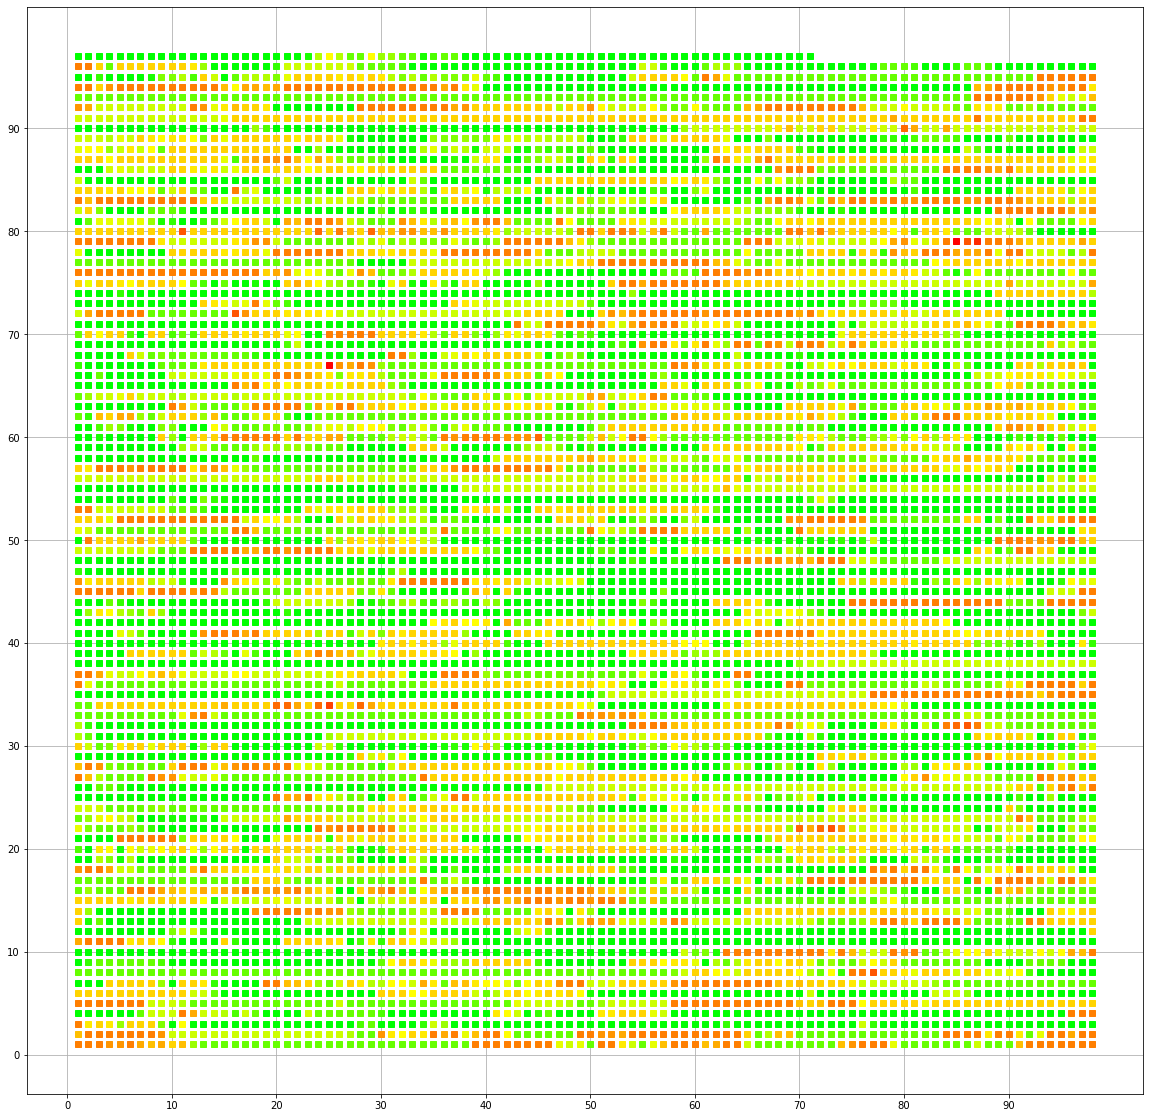

In [13]:
#show the whole windows quality
plt.figure(figsize=(20, 20))
ax = plt.gca()
color_sqrt=int(len(color_windows)**0.5//1+1)
plt.xticks(np.arange(0,color_sqrt,10))
plt.yticks(np.arange(0,color_sqrt,10))
ax.grid()
for yaxis in range(color_sqrt):
    for xaxis in range(color_sqrt):
        state=[xaxis,yaxis]
        index = state[0]+state[1]*color_sqrt
        if(index>=len(color_windows)):
            break
        color= color_windows[index]
        plt.plot(state[0]+1,state[1]+1, linewidth = '1', label = "end", color=color, linestyle=':', marker='s',markersize=6)
plt.show()

### Filter Good Windows

In [ ]:
windows_by_color=pipeline.get_windows_by_color(score_color=score_color,
                                                windows_df=windows_df,
                                                color_score_range=list(range(36,44)),
                                                windows_size=360)
windows_by_color.to_csv('good_windows_df_360.csv',index=False,header=True)

### show the quality of the filtered windows

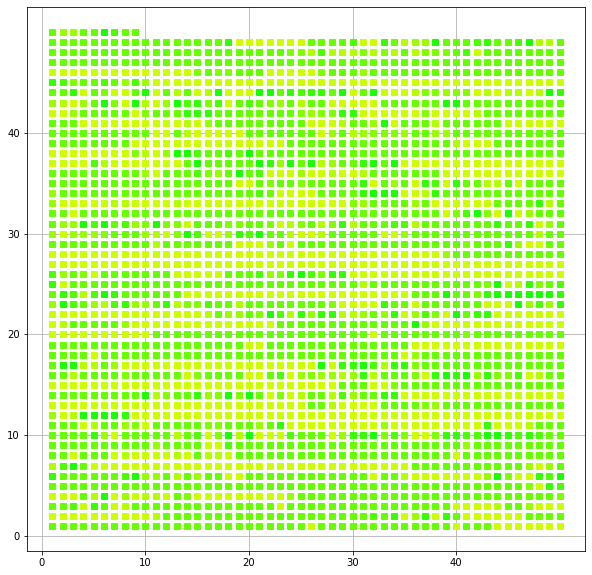

In [14]:
good_windows,good_windows_count_per_patient = pipeline.generate_windows_df(windows_by_color,windows_size=360)
windows_by_color,good_windows_count_per_patient,good_windows_mark_df=pipeline.generate_windows_mark_csv(good_windows,
                                                                                                good_windows_count_per_patient,
                                                                                                windows_size=360,
                                                                                                drop_feature=drop_feature)
good_color_windows,good_score_color=pipeline.get_color_windows(good_windows_mark_df)

#show the whole windows quality
plt.figure(figsize=(10, 10))
ax = plt.gca()
color_sqrt=int(len(good_color_windows)**0.5//1+1)
plt.xticks(np.arange(0,color_sqrt,10))
plt.yticks(np.arange(0,color_sqrt,10))
ax.grid()
for yaxis in range(color_sqrt):
    for xaxis in range(color_sqrt):
        state=[xaxis,yaxis]
        index = state[0]+state[1]*color_sqrt
        if(index>=len(good_color_windows)):
            break
        color= good_color_windows[index]
        plt.plot(state[0]+1,state[1]+1, linewidth = '1', label = "end", color=color, linestyle=':', marker='s',markersize=6)
plt.show()